In [1]:
#Importacion de librerias al proyecto
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import scipy.optimize as opt

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import *
import missingno as msno

from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

#SVM
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

from pyod.models.knn import KNN

import scipy.stats as stats
from scipy.stats import iqr

In [2]:
#pip install missingno

In [3]:
#pip install pyod

In [4]:
#pip install imblearn

#### Lectura del dataset y primera visualización de los datos

In [5]:
#df = pd.read_csv('heart_dataset.csv')
df = pd.read_csv('heart_2020_cleaned.csv')
print(df['HeartDisease'].value_counts()/len(df))
print(df['HeartDisease'].value_counts())

print(df.shape)
df

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Descripción Variables

In [6]:
print(unique_labels(df['Smoking']))
print(unique_labels(df['AlcoholDrinking']))
print(unique_labels(df['Stroke']))
print(unique_labels(df['DiffWalking']))
print(unique_labels(df['Sex']))
print(unique_labels(df['AgeCategory']))
print(unique_labels(df['Race']))
print(unique_labels(df['Diabetic']))
print(unique_labels(df['PhysicalActivity']))
print(unique_labels(df['GenHealth']))
print(unique_labels(df['Asthma']))
print(unique_labels(df['KidneyDisease']))
print(unique_labels(df['SkinCancer']))

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
['No' 'Yes']
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [9]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Gráficos

In [10]:
i = 0
Labels = df.columns
Labels = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

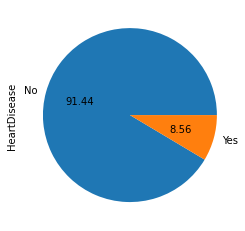

In [11]:
i = 0
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

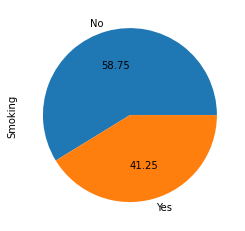

In [12]:
i = 1
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

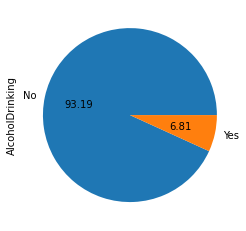

In [13]:
i = 2
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")
i = i+1

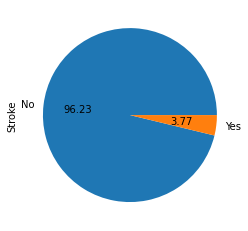

In [14]:
i = 3
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

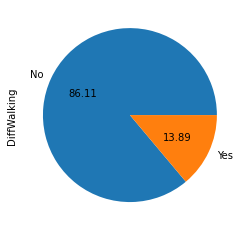

In [15]:
i = 4
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

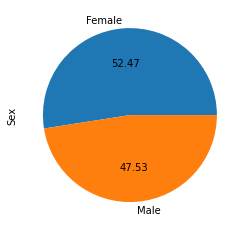

In [16]:
i = 5
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")


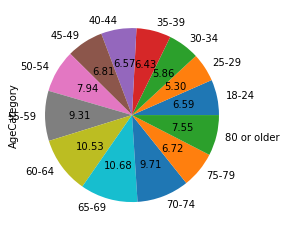

In [17]:
i = 6
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")


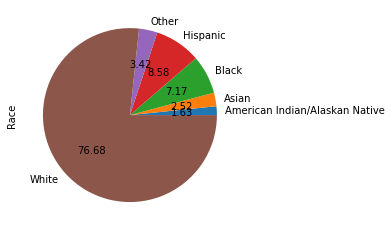

In [18]:
i = 7
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")


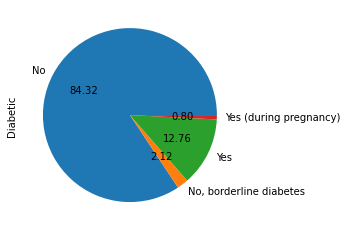

In [19]:
i = 8
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

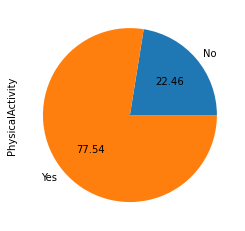

In [20]:
i = 9
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

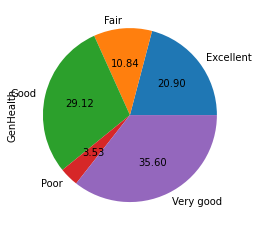

In [21]:
i = 10
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

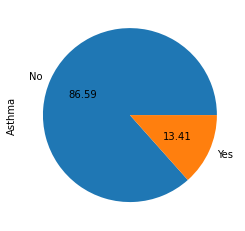

In [22]:
i = 11
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

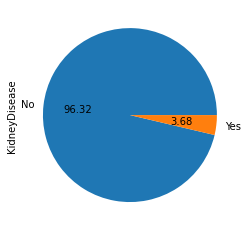

In [23]:
i = 12
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

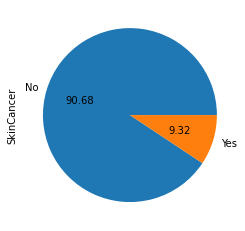

In [24]:
i = 13
df.groupby(Labels[i]).size().plot(kind='pie', autopct='%.2f', label= Labels[i])
plt.savefig(Labels[i]+".png")

In [25]:
#df_num = pd.DataFrame(df, columns=["BMI","PhysicalHealth","MentalHealth","SleepTime", "HeartDisease"])
#df['HeartDisease'].astype('category')

#sns_plot = sns.pairplot(df_num, diag_kind='kde', hue ="HeartDisease")
#plt.savefig("pair_plot.png")

### Asignar variables categóricas con números

In [26]:
dic = {'No': 0, 'Yes': 1}
df['HeartDisease'] = df['HeartDisease'].map(dic)#.astype('category')
df['Smoking'] = df['Smoking'].map(dic)#.astype('category')
df['AlcoholDrinking'] = df['AlcoholDrinking'].map(dic)#.astype('category')
df['Stroke'] = df['Stroke'].map(dic)#.astype('category')
df['DiffWalking'] = df['DiffWalking'].map(dic)#.astype('category')
df['PhysicalActivity'] = df['PhysicalActivity'].map(dic)#.astype('category')
df['Asthma'] = df['Asthma'].map(dic)#.astype('category')
df['KidneyDisease'] = df['KidneyDisease'].map(dic)#.astype('category')
df['SkinCancer'] = df['SkinCancer'].map(dic)#.astype('category')

dic = {'Male': 0, 'Female': 1}
df['Sex'] = df['Sex'].map(dic)#.astype('category')
 
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,Hispanic,No,0,Good,12.0,0,0,0


In [27]:
#Aplicacion de la transformacion one_hot
y = pd.get_dummies(df.Race, prefix='Race')
df = pd.concat([df, y], axis=1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,8.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,...,6.0,1,0,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,...,5.0,1,0,0,0,0,0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,...,6.0,0,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,...,12.0,0,0,0,0,0,0,1,0,0


In [28]:
#Eliminacion de la columna Race
df.drop('Race', inplace=True, axis=1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,8.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,...,6.0,1,0,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,...,5.0,1,0,0,0,0,0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,...,6.0,0,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,...,12.0,0,0,0,0,0,0,1,0,0


In [29]:
'''df['Race_American Indian/Alaskan Native'] = df['Race_American Indian/Alaskan Native']#.astype('category')
df['Race_Asian'] = df['Race_Asian']#.astype('category')
df['Race_Black'] = df['Race_Black']#.astype('category')
df['Race_Hispanic'] = df['Race_Hispanic']#.astype('category')
df['Race_Other'] = df['Race_Other']#.astype('category')    
df['Race_White'] = df['Race_White']#.astype('category')'''

"df['Race_American Indian/Alaskan Native'] = df['Race_American Indian/Alaskan Native']#.astype('category')\ndf['Race_Asian'] = df['Race_Asian']#.astype('category')\ndf['Race_Black'] = df['Race_Black']#.astype('category')\ndf['Race_Hispanic'] = df['Race_Hispanic']#.astype('category')\ndf['Race_Other'] = df['Race_Other']#.astype('category')    \ndf['Race_White'] = df['Race_White']#.astype('category')"

In [30]:
#AgeCategory
#A cada rango se le asigna un número
dic = {}

dic["18-24"] = 0
j = 1
for i in np.arange(25, 80, 5):
    dic[str(i)+"-"+str(i+4)] = j
    j = j+1
    
dic["80 or older"] = j

dic

{'18-24': 0,
 '25-29': 1,
 '30-34': 2,
 '35-39': 3,
 '40-44': 4,
 '45-49': 5,
 '50-54': 6,
 '55-59': 7,
 '60-64': 8,
 '65-69': 9,
 '70-74': 10,
 '75-79': 11,
 '80 or older': 12}

In [31]:
#Cambiando los valores de AgeCategory de rango a valores discretos
df['AgeCategory'] = df['AgeCategory'].map(dic)#.astype('category')

In [32]:
#Aplicacion de la transformacion one_hot a la columna Diabetic
x = pd.get_dummies(df.Diabetic, prefix='Diabetic')
df = pd.concat([df, x], axis=1)
df.drop('Diabetic', inplace=True, axis=1)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,...,0,0,0,1,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [33]:
df['Diabetic_No'] = df['Diabetic_No']#.astype('category')
df['Diabetic_No, borderline diabetes'] = df['Diabetic_No, borderline diabetes']#.astype('category')
df['Diabetic_Yes'] = df['Diabetic_Yes']#.astype('category')
df['Diabetic_Yes (during pregnancy)'] = df['Diabetic_Yes (during pregnancy)']#.astype('category')

In [34]:
#Distintos valores de la variable GenHealth
unique_labels(df['GenHealth'])

array(['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], dtype='<U9')

In [35]:
#Cambiando los valores de string a enteros con orden
dic = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}

df['GenHealth'] = df['GenHealth'].map(dic)#.astype('category')


In [36]:
#Descripcion del dataset de aquellas variables que son numericas
dfNumerical = pd.DataFrame(df, columns=["BMI","PhysicalHealth","MentalHealth","SleepTime"])
dfNumerical.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [37]:
#Descripcion de todo el dataset
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,...,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779,0.843206,0.021204,0.127588,0.008002
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,...,0.126499,0.156819,0.258041,0.280104,0.181671,0.422883,0.363607,0.144065,0.333631,0.089095
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,...,0,0,0,1,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


## No hay NaN 

In [39]:
print(len(df))

df.dropna()

print(len(df))

319795
319795


### Correlaciones

Como se puede observar en la tabla de debajo ninguna variable numérica se encuentra correlacionada a más de 0.5 en valor absoluto con otra variable numérica del dataset

In [40]:
#Cálculo de las correlaciones usando el método Spearman
correl=df.corr(method='spearman')

#correl[abs(correl) >= 0.5]
correl

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
HeartDisease,1.000000,0.057355,0.107764,-0.032080,0.196835,0.143064,-0.003444,0.201258,-0.070040,0.239298,...,0.008547,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,-0.170977,0.016182,0.183072,-0.013930
BMI,0.057355,1.000000,0.028788,-0.039295,0.021597,0.093134,0.024011,0.154506,-0.064332,0.006298,...,0.026708,-0.087101,0.076363,0.026599,0.008243,-0.043445,-0.206610,0.050316,0.201951,0.005599
Smoking,0.107764,0.028788,1.000000,0.111768,0.061226,0.092659,0.050658,0.120074,-0.085052,0.122055,...,0.035667,-0.060308,-0.038249,-0.066873,0.016205,0.072367,-0.055127,0.007143,0.058434,-0.005385
AlcoholDrinking,-0.032080,-0.039295,0.111768,1.000000,-0.019858,-0.012853,0.056525,-0.035328,-0.004200,-0.062234,...,-0.004243,-0.022275,-0.025980,-0.015554,0.005455,0.033342,0.057644,-0.008165,-0.058208,-0.004077
Stroke,0.196835,0.021597,0.061226,-0.019858,1.000000,0.116252,0.026438,0.174143,0.003091,0.140245,...,0.014357,-0.016060,0.024819,-0.025823,0.005743,0.001154,-0.102787,0.011172,0.108407,-0.004526
PhysicalHealth,0.143064,0.093134,0.092659,-0.012853,0.116252,1.000000,0.276983,0.355052,0.062744,0.057390,...,0.019108,-0.039085,0.016052,-0.012951,0.015490,0.000907,-0.136290,0.019338,0.138636,0.005802
MentalHealth,-0.003444,0.024011,0.050658,0.056525,0.026438,0.276983,1.000000,0.107651,0.137340,-0.231967,...,0.014166,-0.020907,0.004124,-0.002033,0.028475,-0.009887,-0.005192,0.004283,-0.002794,0.024726
DiffWalking,0.201258,0.154506,0.120074,-0.035328,0.174143,0.355052,0.107651,1.000000,0.068860,0.243872,...,0.025205,-0.038830,0.039615,-0.008214,0.008483,-0.015516,-0.209640,0.031843,0.216605,-0.007040
Sex,-0.070040,-0.064332,-0.085052,-0.004200,0.003091,0.062744,0.137340,0.068860,1.000000,0.066597,...,0.003434,-0.013716,0.037280,0.003607,-0.008762,-0.017314,-0.003636,0.004295,-0.020718,0.085477
AgeCategory,0.239298,0.006298,0.122055,-0.062234,0.140245,0.057390,-0.231967,0.243872,0.066597,1.000000,...,-0.026835,-0.081475,-0.037608,-0.161293,-0.060367,0.193959,-0.202832,0.047967,0.210008,-0.036189


In [41]:
df.iloc[:, 0]

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [42]:
correl2 = correl[(abs(correl) != 1)]
correl2 = correl2[(abs(correl2) >= 0.5)]
correl2.dropna()
correl2

l =[]
for c in correl:
    for r in correl:
        #print(correl[c][r])
        if abs(correl[c][r]) > 0.4 and correl[c][r] != 1:
            l.append(c+" && " + r +": " + str(correl[c][r]))
            
print(l)

['PhysicalHealth && GenHealth: -0.40792639880573317', 'GenHealth && PhysicalHealth: -0.40792639880573317', 'Race_Black && Race_White: -0.5040402992221741', 'Race_Hispanic && Race_White: -0.5555711160223381', 'Race_White && Race_Black: -0.5040402992221741', 'Race_White && Race_Hispanic: -0.5555711160223381', 'Diabetic_No && Diabetic_Yes: -0.886841227138652', 'Diabetic_Yes && Diabetic_No: -0.886841227138652']


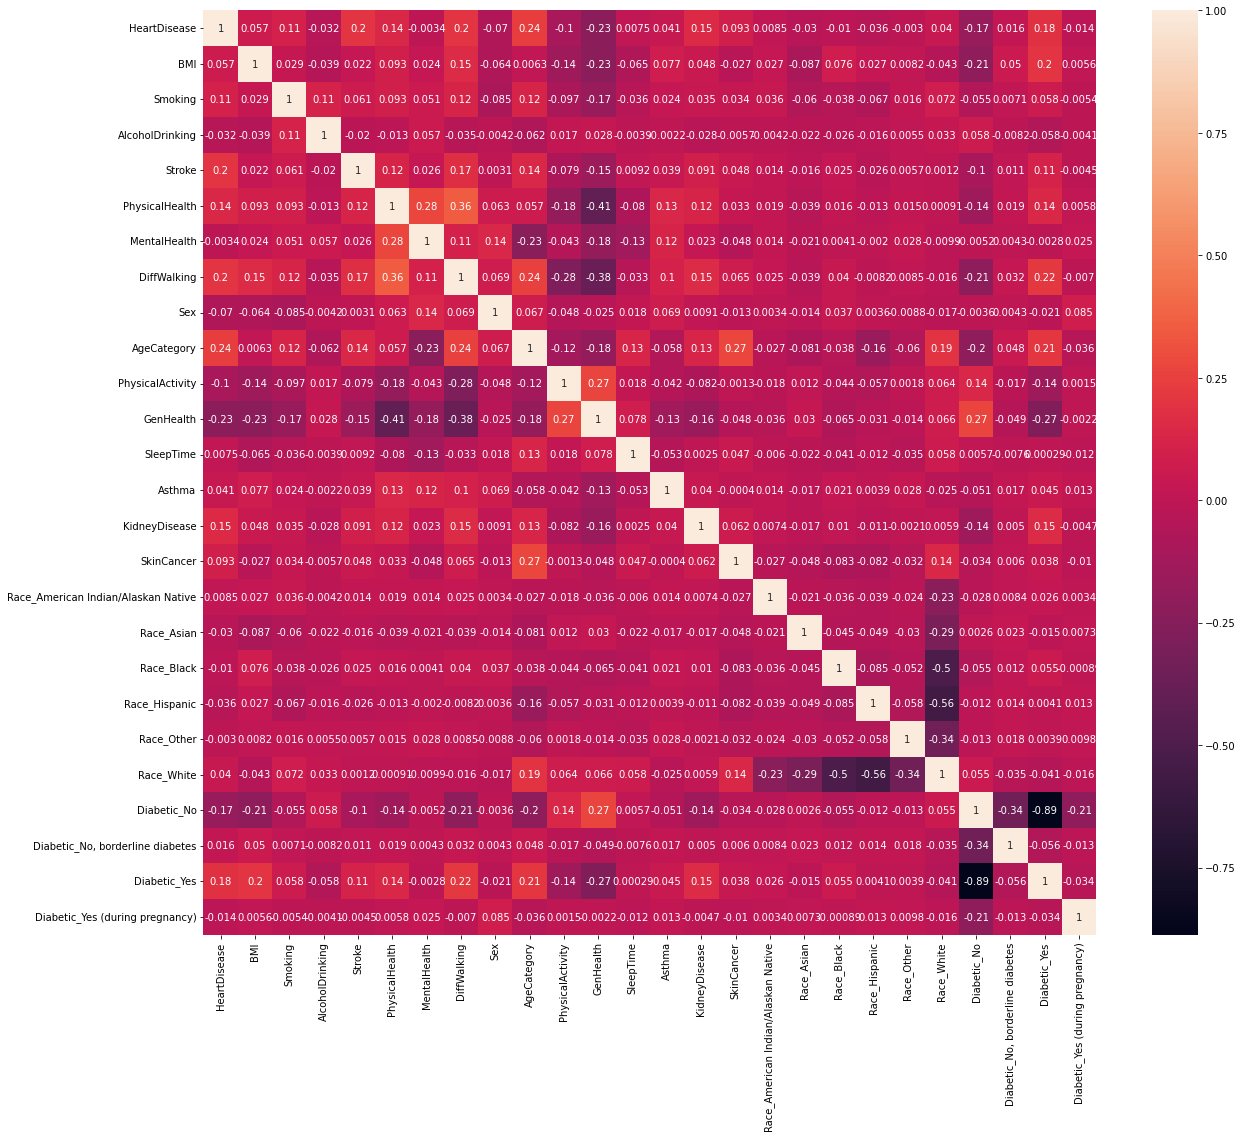

In [43]:
#Gráfico de las correlaciones de par de variables
plt.rcParams["figure.figsize"] = (20, 17)
heatMap = sns.heatmap(correl, 
        xticklabels=correl.columns,
        yticklabels=correl.columns, annot = True)
plt.savefig("corr_heatMap.png")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

GenHealth                             -0.225173
Diabetic_No                           -0.170977
PhysicalActivity                      -0.100030
Sex                                   -0.070040
Race_Hispanic                         -0.036163
AlcoholDrinking                       -0.032080
Race_Asian                            -0.030262
Diabetic_Yes (during pregnancy)       -0.013930
Race_Black                            -0.010156
MentalHealth                          -0.003444
Race_Other                            -0.003039
SleepTime                              0.007521
Race_American Indian/Alaskan Native    0.008547
Diabetic_No, borderline diabetes       0.016182
Race_White                             0.040121
Asthma                                 0.041444
BMI                                    0.057355
SkinCancer                             0.093317
Smoking                                0.107764
PhysicalHealth                         0.143064
KidneyDisease                          0

/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/3321885215.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  heatMap = sns.heatmap(order[:, np.newaxis], xticklabels=["HeartDisease"],


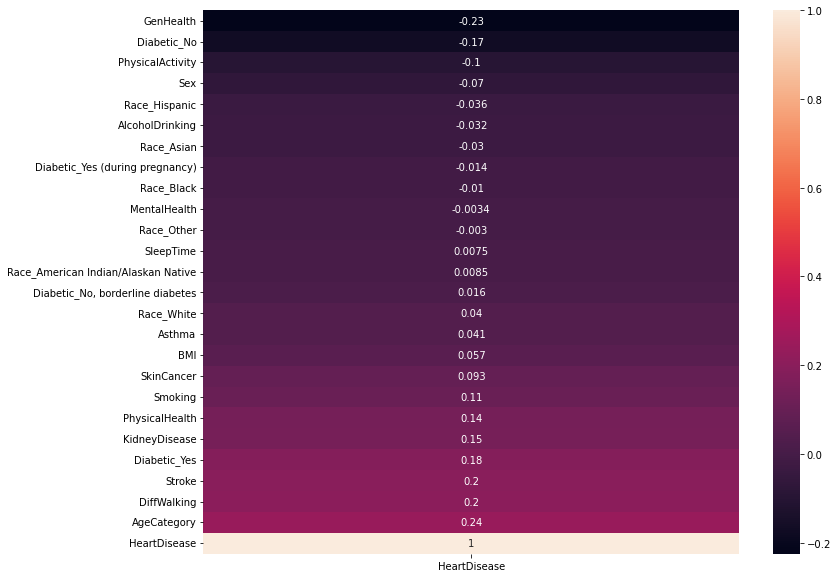

In [44]:
#Correlación de las varibles respecto a la variable de salida

plt.rcParams["figure.figsize"] = (12, 10)
order = correl["HeartDisease"].sort_values();
print(order)
heatMap = sns.heatmap(order[:, np.newaxis], xticklabels=["HeartDisease"],
        yticklabels=order.index, annot = True)
plt.savefig("corr_heatMap_HeartDisease.png")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

## Eliminar outliers

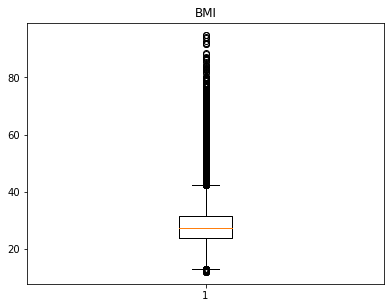

In [45]:
i = 0
Labels = ["BMI","PhysicalHealth","MentalHealth","SleepTime"]
fig7, ax7 = plt.subplots()
ax7.set_title(Labels[i])
ax7.boxplot(df[Labels[i]])
plt.savefig("BoxPlot.png")

In [46]:

# encontrar Q1, Q3 y rango intercuartílico para cada columna
Q1 = df[["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]].quantile (q = .25)
Q3 = df[["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]].quantile (q = .75)
IQR = df.apply (stats.iqr)

# solo mantenga las filas en el marco de datos que tengan valores dentro de 1.5 * IQR de Q1 y Q3
data_clean_no_outliers = df [~ ((df <(Q1-1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))). any (axis = 1)]

# encontrar cuántas filas quedan en el marco de datos 
data_clean_no_outliers.shape

data_clean_no_outliers["HeartDisease"].value_counts()

/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/6482814.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean_no_outliers = df [~ ((df <(Q1-1.5 * IQR)) | (df> (Q3 + 1.5 * IQR))). any (axis = 1)]


0    215159
1     15861
Name: HeartDisease, dtype: int64

## Normalizar los datos

In [47]:
#Normalización de los datos usando estandarización

scaler_x = StandardScaler()
#Tambien se puede aplicar MinMaxScaler, pero queremos mantener la distribución original de las variables
#scaler_x = MinMaxScaler()
scaler_x.fit(df)
data_scaled = scaler_x.transform(df)
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
print(df_scaled)

        HeartDisease       BMI   Smoking  AlcoholDrinking    Stroke  \
0          -0.305954 -1.844750  1.193474         -0.27032 -0.198040   
1          -0.305954 -1.256338 -0.837890         -0.27032  5.049478   
2          -0.305954 -0.274603  1.193474         -0.27032 -0.198040   
3          -0.305954 -0.647473 -0.837890         -0.27032 -0.198040   
4          -0.305954 -0.726138 -0.837890         -0.27032 -0.198040   
...              ...       ...       ...              ...       ...   
319790      3.268465 -0.144019  1.193474         -0.27032 -0.198040   
319791     -0.305954  0.238291  1.193474         -0.27032 -0.198040   
319792     -0.305954 -0.642753 -0.837890         -0.27032 -0.198040   
319793     -0.305954  0.705560 -0.837890         -0.27032 -0.198040   
319794     -0.305954  2.868839 -0.837890         -0.27032 -0.198040   

        PhysicalHealth  MentalHealth  DiffWalking       Sex  AgeCategory  ...  \
0            -0.046751      3.281069    -0.401578  0.951711     0.

In [48]:
#A las variables númericas se le aplica la normalización de los datos
df[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']] = df_scaled[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']]

In [49]:
#df = df_scaled
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,1,0.136184,...,0,0,0,0,0,1,0,0,1,0
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,1,1.538806,...,0,0,0,0,0,1,1,0,0,0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,0,0.697233,...,0,0,0,0,0,1,0,0,1,0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,1,1.258282,...,0,0,0,0,0,1,1,0,0,0
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,1,-0.705388,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.144019,1,0,0,0.456341,-0.490039,1,0,0.416709,...,0,0,0,1,0,0,0,0,1,0
319791,0,0.238291,1,0,0,-0.424070,-0.490039,0,0,-0.985913,...,0,0,0,1,0,0,1,0,0,0
319792,0,-0.642753,0,0,0,-0.424070,-0.490039,0,1,-0.424864,...,0,0,0,1,0,0,1,0,0,0
319793,0,0.705560,0,0,0,-0.424070,-0.490039,0,1,-1.546961,...,0,0,0,1,0,0,1,0,0,0


In [50]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
count,319795.000000,3.197950e+05,319795.000000,319795.000000,319795.000000,3.197950e+05,3.197950e+05,319795.000000,319795.000000,3.197950e+05,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,-8.982963e-16,0.412477,0.068097,0.037740,8.298850e-15,-7.510435e-15,0.138870,0.524727,4.836547e-15,...,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779,0.843206,0.021204,0.127588,0.008002
std,0.279766,1.000002e+00,0.492281,0.251912,0.190567,1.000002e+00,1.000002e+00,0.345812,0.499389,1.000002e+00,...,0.126499,0.156819,0.258041,0.280104,0.181671,0.422883,0.363607,0.144065,0.333631,0.089095
min,0.000000,-2.565319e+00,0.000000,0.000000,0.000000,-4.240698e-01,-4.900386e-01,0.000000,0.000000,-1.827486e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-6.757926e-01,0.000000,0.000000,0.000000,-4.240698e-01,-4.900386e-01,0.000000,0.000000,-7.053884e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.550322e-01,0.000000,0.000000,0.000000,-4.240698e-01,-4.900386e-01,0.000000,1.000000,1.361845e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,4.868719e-01,1.000000,0.000000,0.000000,-1.725240e-01,-1.129278e-01,0.000000,1.000000,6.972330e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.046628e+01,1.000000,1.000000,1.000000,3.349118e+00,3.281069e+00,1.000000,1.000000,1.538806e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlated Scaled Dataset

In [51]:
#Reducción del dataset a 10 variables, usando únicamente las que están más relacionadas a la variable de salida
df_copia = df[['HeartDisease', 'AgeCategory', 'DiffWalking', 'Diabetic_Yes', 'KidneyDisease', 'PhysicalHealth', 'Smoking', 'GenHealth', 'Diabetic_No', 'PhysicalActivity', 'Stroke']]
df_copia

,HeartDisease,AgeCategory,DiffWalking,Diabetic_Yes,KidneyDisease,PhysicalHealth,Smoking,GenHealth,Diabetic_No,PhysicalActivity,Stroke
0,0,0.136184,0,1,0,-0.046751,1,0.388307,0,1,0
1,0,1.538806,0,0,0,-0.424070,0,0.388307,1,1,1
2,0,0.697233,0,1,0,2.091388,1,-1.529392,0,1,0
3,0,1.258282,0,0,0,-0.424070,0,-0.570542,1,0,0
4,0,-0.705388,1,0,0,3.097572,0,0.388307,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.416709,1,1,0,0.456341,1,-1.529392,0,0,0
319791,0,-0.985913,0,0,0,-0.424070,1,0.388307,1,1,0
319792,0,-0.424864,0,0,0,-0.424070,0,-0.570542,1,1,0
319793,0,-1.546961,0,0,0,-0.424070,0,-0.570542,1,0,0


## Dataset 11 variables y eliminación de Outliers

In [52]:
# encontrar Q1, Q3 y rango intercuartílico para cada columna
Q1 = df_copia[['PhysicalHealth']].quantile (q = .25)
Q3 = df_copia[['PhysicalHealth']].quantile (q = .75)
IQR = df.apply(stats.iqr)

# solo mantenga las filas en el marco de datos que tengan valores dentro de 1.5 * IQR de Q1 y Q3
data_clean_11var_noOutliers = df_copia[~ ((df_copia <(Q1-1.5 * IQR)) | (df_copia> (Q3 + 1.5 * IQR))). any (axis = 1)]

# encontrar cuántas filas quedan en el marco de datos 
data_clean_11var_noOutliers.shape

data_clean_11var_noOutliers["HeartDisease"].value_counts()

/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/3659320175.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean_11var_noOutliers = df_copia[~ ((df_copia <(Q1-1.5 * IQR)) | (df_copia> (Q3 + 1.5 * IQR))). any (axis = 1)]


0    247510
1     17533
Name: HeartDisease, dtype: int64

## Balanceado datos

In [53]:
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

print(Y)

[0. 0. 0. ... 0. 0. 0.]


In [54]:
#Funciones para el balanceado de datos
#Smote hace un Oversampling
#Mientras que RandomSampler y NearMiss hacen un Undersampling

smote = SMOTE(random_state=1000)
rus = RandomUnderSampler(random_state=1000)
nm = NearMiss()            

## División Training, Validación y Test

In [55]:
def train_validation_test(X, Y, sampler):

    RANDOM_STATE = 7777
    #Dividimos los datos en training y test con 0.6 training y 0.4 test
    X_train, X_temp, Y_train, Y_temp  = train_test_split(X, Y, test_size=0.4, random_state=RANDOM_STATE, stratify=Y)
    
    X_train, Y_train = sampler.fit_resample(X_train,Y_train)
    
    #Los datos de test los volvemos a dividir en 0.2 validación y 0.2 test
    X_val , X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=Y_temp)
    
    return X_train,Y_train, X_val,Y_val, X_test,Y_test


In [56]:
#Comprobación y visualización de la cantidad de datos que obtenemos luego de hacer la división
#de entrenamiento, test y validación

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
print(np.unique(Y_train, return_counts=True))
print(np.unique(Y_val, return_counts=True))
print(np.unique(Y_test, return_counts=True))

(array([0., 1.]), array([16424, 16424]))
(array([0., 1.]), array([58484,  5475]))
(array([0., 1.]), array([58485,  5474]))


### Curva aprendizaje para visualizar under y overfitting

In [57]:
#Función para pintar las gráficas de las curvas de aprendizaje
def draw_learning_curve(err1, err2, title, label, lmb):
    
    b = err1
    plt.title(title)
    plt.xlabel(label)
    plt.ylabel("Recall")
    plt.plot(lmb, b, c="blue", label="Train")
    
    d = err2[0:len(err1)]
    plt.plot(lmb, d, c="orange", label="Cross Validation")
    plt.legend()

## Regresión logística

In [58]:
#Función Sigmoide
def sigmoid_funct(z):
    return 1 / (1 + np.exp(-z))

#Función de coste regularizada
def func_coste_reg(Thetas, X, Y, lmb, m):
    return cost_funct(Thetas, X, Y) + regularizacion(Thetas[1:], lmb, m)

#Función de regularización
def regularizacion(Thetas, lmb, m):
    return (lmb/(2*m))*np.sum(Thetas**2)

#Función de gradiente regularizado
def func_grad_reg(Thetas, X, Y, lmb, m):
    return np.add(gradient(Thetas, X, Y), reg_grad(Thetas[1:], lmb, m))

#Regularización del gradiente
def reg_grad(Thetas, lmb, m):
        return np.insert(lmb/m*Thetas, 0, values=[0])
    
#Función de coste sin regularización
def cost_funct(Theta, X, Y):
    g = sigmoid_funct(np.matmul(X, Theta))
    m = np.shape(X)[0]
    
    J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
    return np.sum(-J)/m

#Función de gradiente sin regularización
def gradient(Theta, X, Y):
    m = np.shape(X)[0]
    g = sigmoid_funct(np.matmul(X,Theta))
    J = np.dot(np.transpose(X), (g - Y))
    return J/m

In [59]:
#Función que calcula el porcentaje de aciertos para la regresión logística
def porcentaje_aciertos_RL(Theta, X, Y, mostrar):

    # Calculamos los valores estimados segun la theta que hemos obtenido
    sigmoid = sigmoid_funct(np.matmul(X, Theta))
    
    if mostrar:
        print(classification_report(Y,(sigmoid >= 0.5), target_names=["no", "si"]))
        print(confusion_matrix(Y,(sigmoid >= 0.5)))
    
    #Obtenemos la especificidad y la sensibilidad
    recall_0 = confusion_matrix(Y,(sigmoid >= 0.5), normalize = "true")[0][0]
    if(len(confusion_matrix(Y,(sigmoid >= 0.5), normalize = "true")) < 2):
        if(np.sum(Y) == 0):
            recall_1 = 1
        else:
            recall_1 = 0
    else:
        recall_1 = confusion_matrix(Y,(sigmoid >= 0.5), normalize = "true")[1][1]
        
    #print(recall_0)
    #print(recall_1)
    #print(len(Y))
    #harm_recall = 2/((1.0/recall_0) + (1.0/recall_1)) 
    # Devolvemos el porcentaje
    #return harm_recall
    return recall_1

In [60]:
def mainRL_Data(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, mul, name):

    #Obtencion de todas las columnas de la tabla menos la de salida la primera
    m = np.shape(X_train)[0]

    print((Y_train== 0).sum())
    print( (Y_train== 1).sum() )
    #Inicializamos las Thetas a 0
    
    #print(Thetas)
    
    #Si la representación que le pasamos al algoritmo no tiene la primera columna ya puesta como 1 se la ponemos dentro
    if(mul == False):
        # Agregamos una columna de 1s
        X_train = np.hstack([np.ones([m, 1]), X_train])

        m_val = np.shape(X_val)[0]
        print(m_val)
        # Agregamos una columna de 1s
        X_val = np.hstack([np.ones([m_val, 1]), X_val])

        m_t = np.shape(X_test)[0]
        print(m_t)
        # Agregamos una columna de 1s
        X_test = np.hstack([np.ones([m_t, 1]), X_test])
    
    print(np.shape(X_train))
    errorT = []
    errorV = []
    
    n = np.shape(X_train)[1]
    print(n)
    Thetas = np.zeros(n)

    Max = 0
    LambdaF= 0
    rangeVals= [];
    for data in range(10,m,1000):

        rangeVals.append(data)
        result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(X_train[0:data],Y_train[0:data],lmb,m), messages=0)

        errorT.append(porcentaje_aciertos_RL(result[0], X_train[0:data], Y_train[0:data], False))

        porcentaje =  porcentaje_aciertos_RL(result[0], X_val, Y_val, False)
        errorV.append(porcentaje)
        if(porcentaje > Max):
            Max = porcentaje
            LambdaF = i

    
    draw_learning_curve(errorT, errorV, "Regresion Logistica", "Num training examples", rangeVals)
    plt.savefig(name)
    #Test
    print("Valores en test")
    print("Para lambda: " + str(LambdaF))
    result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(X_train,Y_train,LambdaF,m), messages=0)
    
    print(result[0])
    porcentaje =  porcentaje_aciertos_RL(result[0], X_test, Y_test, True)

    print("Recall para la clase 1: " + str(porcentaje))

In [61]:

def mainRL(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, mul, name):

    #Obtencion de todas las columnas de la tabla menos la de salida la primera
    m = np.shape(X_train)[0]
    
    print((Y_train== 0).sum())
    print( (Y_train== 1).sum() )
    #Inicializamos las Thetas a 0
    
    #Si la representación que le pasamos al algoritmo no tiene la primera columna ya puesta como 1 se la ponemos dentro
    if(mul == False):
        # Agregamos una columna de 1s
        X_train = np.hstack([np.ones([m, 1]), X_train])

        m_val = np.shape(X_val)[0]
        print(m_val)
        # Agregamos una columna de 1s
        X_val = np.hstack([np.ones([m_val, 1]), X_val])

        m_t = np.shape(X_test)[0]
        print(m_t)
        # Agregamos una columna de 1s
        X_test = np.hstack([np.ones([m_t, 1]), X_test])
    
    print(np.shape(X_train))
    errorT = []
    errorV = []
    
    n = np.shape(X_train)[1]
    print(n)
    Thetas = np.zeros(n)

    Max = 0
    LambdaF= 0
    #Para cada lambda calculamos las Thetas óptimas, pintamos la función y sacamos el porcentaje de aciertos
    for i in lmb:
        result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(X_train,Y_train,i,m), messages=0)
        print("Lambda: " , i)
        errorT.append(porcentaje_aciertos_RL(result[0], X_train, Y_train, False))

        #print(result[0])
        porcentaje =  porcentaje_aciertos_RL(result[0], X_val, Y_val, False)
        print("Resultado en validación: " + str(porcentaje))
        errorV.append(porcentaje)
        if(porcentaje > Max):
            Max = porcentaje
            LambdaF = i
        

    draw_learning_curve(errorT, errorV, "Regresion Logística", "lambda", lmb)
    plt.savefig(name)
    #Test
    print("Valores en test")
    print("Para lambda: " + str(LambdaF))
    result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(X_train,Y_train,LambdaF,m), messages=0)
    #print(result[0])
    porcentaje =  porcentaje_aciertos_RL(result[0], X_test, Y_test, True)
    print("Recall para la clase 1: " + str(porcentaje))

16424
16424
(32848, 3276)
3276


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:2

Valores en test
Para lambda: 0


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))


[-0.21445587  0.06227959  0.02443443 ...  0.          0.
 -0.0490944 ]
              precision    recall  f1-score   support

          no       0.97      0.73      0.84     58485
          si       0.21      0.77      0.33      5474

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.59     63959
weighted avg       0.91      0.74      0.79     63959

[[42944 15541]
 [ 1247  4227]]
Recall para la clase 1: 0.7721958348556814


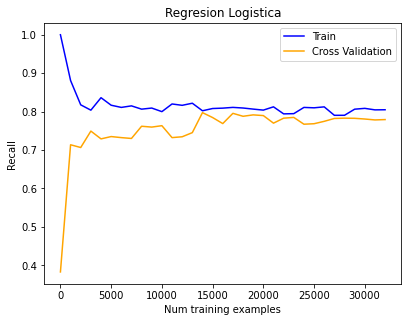

In [62]:
df_array = np.array(df)

X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#No regularizamos
lmb = 0
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
X_train, Y_train = shuffle(X_train, Y_train)


#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 2
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)


mainRL_Data(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True, "Lmb_0_Pol2.png")

16424
16424
63959
63959
(32848, 3277)
3277
Lambda:  145
Resultado en validación: 0.7914155251141552
Lambda:  150
Resultado en validación: 0.7912328767123288
Lambda:  155
Resultado en validación: 0.7914155251141552
Lambda:  160
Resultado en validación: 0.7912328767123288
Lambda:  170
Resultado en validación: 0.7910502283105023
Valores en test
Para lambda: 145
              precision    recall  f1-score   support

          no       0.97      0.73      0.84     58485
          si       0.22      0.79      0.34      5474

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.79     63959

[[42942 15543]
 [ 1167  4307]]
Recall para la clase 1: 0.7868103763244428


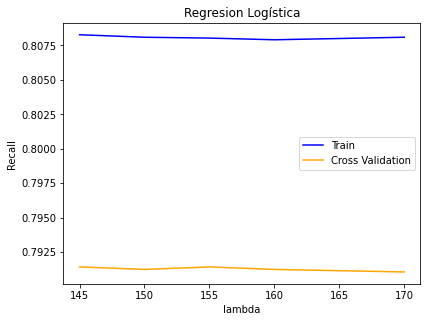

In [63]:
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#lmb = [0,0.1,0.25,0.5,1,1.5, 2,3,4,5,6,7,10,15,20,25,30,50,100,150,200]
lmb = [145,150,155,160,170]
#lmb = [15,16,17,18,19,20,21,22,23,24,25]
#lmb = [50,60100,150,200]
#lmb = [0,0.05, 0.1, 0.15, 0.2, 0.25]
#lmb = [50,60,70,80,90,95,100,105,110,120]
#lmb = [1]
#lmb = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5 ]
#X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(Xrus, Yrus)

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 3
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)


mainRL(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, False, "RL_reg_0_200_pol3.png")

### Dataset con 11 variables

16424
16424
(32848, 286)
286


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:2

Valores en test
Para lambda: 0
[-7.52244698e-01  1.19820359e+00  5.64648903e-02  1.45610356e-01
  7.12828175e-01  5.57660949e-01 -5.52009161e-02 -3.24364529e-01
 -1.74059610e-01 -1.03079345e-01  5.57592084e-01  1.00985057e-01
  2.65733996e-02 -1.96579315e-01  1.41791469e-01 -1.74659493e-01
  2.78562077e-02  1.85696011e-02 -1.84126589e-02  1.79089648e-02
 -4.29018867e-01  5.64648903e-02  1.36361141e-01  7.17476484e-02
 -7.91522261e-03 -2.25920742e-02  8.25438370e-02  1.52535802e-01
  4.85399019e-02  1.15676466e-01  1.45610356e-01 -4.32229147e-01
 -2.22772441e-01  1.56691333e-01  2.69065436e-02  0.00000000e+00
  3.58524686e-02 -1.47189712e-01  7.12828175e-01  4.48722159e-02
 -5.89250847e-01 -1.73428830e-01 -5.01959147e-01  1.22663312e-01
  1.76966587e+00 -2.45406146e-01  4.23821373e-03 -1.27395084e-03
 -1.96474275e-01 -6.34760654e-03 -2.01507456e-01 -5.52009161e-02
 -8.21367904e-02  2.33326441e-01  1.86659427e-01  1.40713755e-01
  1.78387990e-01 -1.55255549e-01 -1.64209667e-02  2.4971260

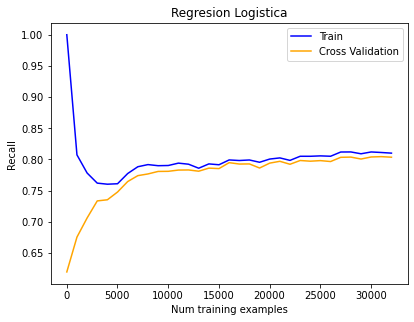

In [64]:
#Dataset con solo 10 variables, prueba de overfitting
df_array = np.array(df_copia)

X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]
#print(Y)
#No regularizamos
lmb = 0
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
X_train, Y_train = shuffle(X_train, Y_train)


#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 3
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)


mainRL_Data(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True, "10Var_Lmb_0_Pol3.png")

16424
16424
(32848, 286)
286
Lambda:  40
Resultado en validación: 0.8051141552511416
Lambda:  45
Resultado en validación: 0.8052968036529681
Lambda:  50
Resultado en validación: 0.8052968036529681
Lambda:  55
Resultado en validación: 0.8052968036529681
Lambda:  60
Resultado en validación: 0.804931506849315
Lambda:  70
Resultado en validación: 0.8047488584474886
Valores en test
Para lambda: 45
              precision    recall  f1-score   support

          no       0.97      0.70      0.82     58485
          si       0.20      0.80      0.32      5474

    accuracy                           0.71     63959
   macro avg       0.59      0.75      0.57     63959
weighted avg       0.91      0.71      0.77     63959

[[41162 17323]
 [ 1097  4377]]
Recall para la clase 1: 0.7995981001096091


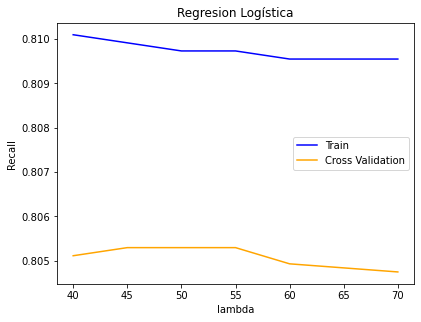

In [65]:
#DataFrame solo con 10 variables
df_array = np.array(df_copia)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#lmb =  [0,0.1,0.25,0.5,1,1.5, 2,3,4,5,6,7,10,15,20,25,30,50,100,150,200]
lmb = [40,45, 50,55,60,70]

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 2
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)

mainRL(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True, "RL_reg_10Var_Tlmb.png")

#### Eliminación de Outliers

9517
9517
(19034, 3276)
3276


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:2

Valores en test
Para lambda: 0


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))


[-0.15194579 -0.00881167  0.07295639 ...  0.          0.
  0.00069352]
              precision    recall  f1-score   support

          no       0.98      0.72      0.83     43032
          si       0.17      0.76      0.28      3172

    accuracy                           0.73     46204
   macro avg       0.57      0.74      0.55     46204
weighted avg       0.92      0.73      0.79     46204

[[31101 11931]
 [  753  2419]]
Recall para la clase 1: 0.762610340479193


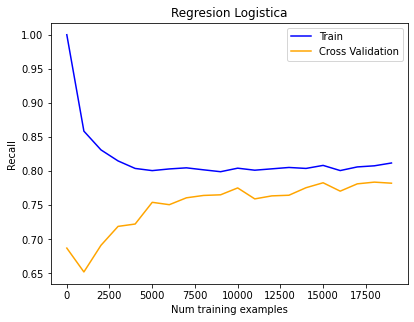

In [66]:
#Dataset entero eliminando outliers, prueba de overfitting
df_array = np.array(data_clean_no_outliers)

X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]
#print(Y)
#No regularizamos
lmb = 0
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
X_train, Y_train = shuffle(X_train, Y_train)


#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 3
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)


mainRL_Data(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True, "RL_NO_OUTLIERS_DATA.png")

9517
9517
(19034, 3276)
3276


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))


Lambda:  0
Resultado en validación: 0.787515762925599


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))


Lambda:  0.1
Resultado en validación: 0.78562421185372


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))


Lambda:  0.25
Resultado en validación: 0.7837326607818411


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))


Lambda:  0.5
Resultado en validación: 0.7805800756620429
Lambda:  1
Resultado en validación: 0.7837326607818411
Lambda:  1.5
Resultado en validación: 0.7849936948297604
Lambda:  2
Resultado en validación: 0.7878310214375788
Lambda:  3
Resultado en validación: 0.7881462799495587
Lambda:  4
Resultado en validación: 0.7878310214375788
Lambda:  5
Resultado en validación: 0.7887767969735183
Lambda:  6
Resultado en validación: 0.7900378310214375
Lambda:  7
Resultado en validación: 0.7919293820933165
Lambda:  10
Resultado en validación: 0.7916141235813366
Lambda:  15
Resultado en validación: 0.7922446406052963
Lambda:  20
Resultado en validación: 0.792875157629256
Lambda:  25
Resultado en validación: 0.792875157629256
Lambda:  30
Resultado en validación: 0.7912988650693569
Lambda:  40
Resultado en validación: 0.7935056746532156
Lambda:  45
Resultado en validación: 0.7941361916771753
Lambda:  50
Resultado en validación: 0.7941361916771753
Lambda:  55
Resultado en validación: 0.7950819672131147

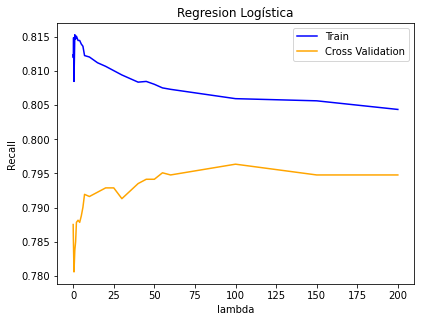

In [67]:
#DataFrame eliminando outliers
df_array = np.array(data_clean_no_outliers)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

lmb =  [0, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 10, 15, 20, 25, 30, 40, 45, 50, 55, 60, 60, 100, 150, 200]
#lmb = [40, 45, 50, 55, 60, 70]

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 2
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)

mainRL(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True, "RL_NO_OUTLIERS_LAMBDA.png")

#### Dataset con 11 variables y eliminación de outliers

10520
10520
(21040, 286)
286


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:26: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:2

Valores en test
Para lambda: 0
[ 6.07290884e-01  1.05359451e+00  1.72425523e-01 -1.02912959e-01
  1.96476705e-01 -9.79232904e-01 -1.47624331e-01 -5.76268741e-01
 -4.13049237e-01 -1.28205908e-01  1.58683286e+00 -3.34904074e-02
 -7.06874622e-02 -1.46274450e-01  2.35003836e-01 -8.59074295e-01
 -1.13824020e-01 -1.36086362e-01  8.28233174e-02 -8.38010513e-02
 -1.19253632e-01  1.72425523e-01 -1.66092175e-01  2.78228222e+00
 -6.63891639e-02  2.27491943e-01  3.82119697e-01 -1.41385088e-01
  1.93072112e-02 -3.13745351e-01 -1.02912959e-01 -1.68843994e-01
 -3.27055334e-01  3.46343696e-01  7.58784068e-02  0.00000000e+00
 -1.13463045e-03 -1.21262383e+00  1.96476705e-01 -4.64176928e+00
  2.62633422e+00 -9.24462425e-02 -4.77206274e-01 -5.27494204e-01
  1.32748977e+00 -1.61277830e+01 -7.67444340e-01  9.10003875e-01
  7.53954223e-01 -1.54772717e-01 -7.54408988e-01 -1.47624331e-01
  1.74714247e-01  2.07381288e-01  6.74222050e-02 -6.43143041e-01
  4.97072963e-02 -4.81284186e-02  1.07696743e-01  8.7041726

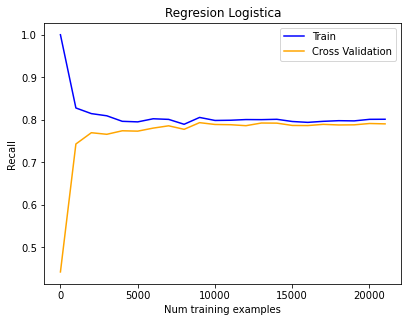

In [68]:
#Dataset entero eliminando outliers, prueba de overfitting
df_array = np.array(data_clean_11var_noOutliers)

X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]
#print(Y)
#No regularizamos
lmb = 0
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
X_train, Y_train = shuffle(X_train, Y_train)


#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 3
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)


mainRL_Data(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True, "RL_NO_OUTLIERS_11VAR_DATA.png")

10520
10520
(21040, 286)
286
Lambda:  0
Resultado en validación: 0.7895637296834902
Lambda:  0.1
Resultado en validación: 0.789848873681209
Lambda:  0.25
Resultado en validación: 0.7895637296834902
Lambda:  0.5
Resultado en validación: 0.7895637296834902
Lambda:  1
Resultado en validación: 0.7907043056743656
Lambda:  1.5
Resultado en validación: 0.7915597376675221
Lambda:  2
Resultado en validación: 0.7915597376675221
Lambda:  3
Resultado en validación: 0.7907043056743656
Lambda:  4
Resultado en validación: 0.7904191616766467
Lambda:  5
Resultado en validación: 0.7904191616766467
Lambda:  6
Resultado en validación: 0.7907043056743656
Lambda:  7
Resultado en validación: 0.7907043056743656
Lambda:  10
Resultado en validación: 0.7918448816652409
Lambda:  15
Resultado en validación: 0.7915597376675221
Lambda:  20
Resultado en validación: 0.7927003136583974
Lambda:  25
Resultado en validación: 0.7929854576561164
Lambda:  30
Resultado en validación: 0.7935557456515541
Lambda:  40
Resultado e

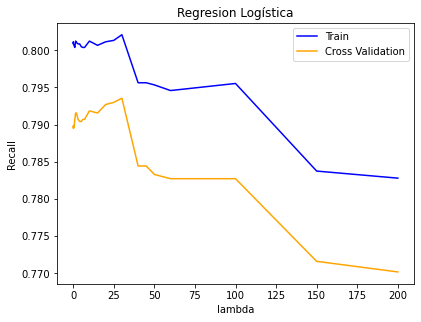

In [69]:
#DataFrame eliminando outliers
df_array = np.array(data_clean_11var_noOutliers)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

lmb =  [0, 0.1, 0.25, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 10, 15, 20, 25, 30, 40, 45, 50, 55, 60, 60, 100, 150, 200]
#lmb = [40, 45, 50, 55, 60, 70]

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 2
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)

mainRL(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True, "RL_NO_OUTLIERS_11VAR_LAMBDA.png")

## Redes neuronales

In [70]:
#Función de coste regularizado
def func_coste_reg(Thetas, X, Y, lmb):
    m = np.shape(X)[0]
    return cost_funct(Y, X, m) + regularizacion(Thetas, lmb, m)

#Función de coste sin regularización
def cost_funct(Y, g, m):
    J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
    return J/m

#Función de regularización
def regularizacion(Thetas, lmb, m):
    suma = 0
    for i in Thetas:
        i = i[:,1:]
        suma += (np.sum(i**2))
    
    return (lmb/(2*m))*suma

In [71]:
#Función que implementa la propagación hacia adelante
def forward_propagation(X, theta1, theta2, m, Y):

    #Capa entrada asignamos la X con los unos incluidos
    a1 = np.hstack([np.ones([m, 1]), X])
    #capa intermedia (hidden) calculamos las ecuaciones de la anterior, aplicamos la sigmoide e incluimos los unos de la neurona 0 
    z2 = np.dot(a1, theta1.T)

    a2 = np.hstack([np.ones([m, 1]), sigmoid_funct(z2)])

    #Capa salida calcuamos las ecuaciones con theta2 y aplicamos la sigmoide, nos devuelve la matriz de salida 5000x10
    z3 = np.dot(a2, theta2.T)

    a3 = sigmoid_funct(z3)
    
    return a1, z2, a2, z3, a3

In [72]:
#Función que genera los pesos aleatorios
def RandomWeights(entradas, salidas, ini):
    Theta = np.random.uniform(-ini, ini, size = (salidas,entradas+1))
    return Theta

In [73]:
#Función que implementa la propagación hacia atrás 
def backprop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, Y, reg):    
    #Recostruimos las Thetas
    Theta1 = np.reshape(params_rn[:num_ocultas *(num_entradas + 1)],(num_ocultas, (num_entradas+1)))
    Theta2 = np.reshape(params_rn[num_ocultas*(num_entradas + 1): ], (num_etiquetas,(num_ocultas+1)))

    m = X.shape[0]    
    y_onehot = Y
    
    a1, z2, a2, z3, a3 = forward_propagation(X, Theta1, Theta2, m, y_onehot)
    #Calculamos el coste
    coste = func_coste_reg([Theta1, Theta2], a3, y_onehot, reg)

    d3 = a3 - y_onehot
    d2 = np.matmul(Theta2.T,d3.T)*(a2*(1-a2)).T
    
    #Calculamos los gradientes no regularizados
    G1 = np.matmul(d2[1:,:], a1)/m
    G2 = np.matmul(d3.T,a2)/m
    
    #Calculamos los gradientes regularizados
    G1 = G1 + ((reg*1.0)/m)*np.insert(Theta1[:, 1:], 0, 0, axis = 1)
    G2 = G2 + ((reg*1.0)/m)*np.insert(Theta2[:, 1:], 0, 0, axis = 1)

    #Ponemos los gradientes en forma de lista
    gradientes = np.concatenate((G1, G2), axis = None)

    return coste, gradientes

In [74]:
#Función que calcula el porcentaje de aciertos para Redes Neuronales
def porcentaje_aciertos_RN(a3, X, Y, show):
    # Calculamos los valores estimados segun la theta que hemos obtenido
    if(show):
        print(classification_report(Y,(a3 >= 0.5), target_names=["no", "si"]))
    
    #Obtenemos la especificidad y la sensibilidad
    recall_0 = confusion_matrix(Y,(a3 >= 0.5), normalize = "true")[0][0]
    if(len(confusion_matrix(Y,(a3 >= 0.5), normalize = "true")) < 2):
        if(np.sum(Y) == 0):
            recall_1 = 1
        else:
            recall_1 = 0
    else:
        recall_1 = confusion_matrix(Y, (a3 >= 0.5) , normalize = "true")[1][1]
    #print(recall_0)
    #print(recall_1)
    #print(len(Y))
    #harm_recall = 2/((1.0/recall_0) + (1.0/recall_1)) 
    # Devolvemos el porcentaje
    #return harm_recall
    return recall_1

In [75]:
def optimize_backprop_and_check_test ( X_test,Y_test, Theta1, Theta2):
   
    #Resultados para Test
    m = X_test.shape[0]
    #Hacemos el forward propagation
    a1, z2, a2, z3, a3 = forward_propagation(X_test, Theta1, Theta2, m, Y_test)
    
    #Sacamos los aciertos
    Y_test = Y_test.ravel()
    accT = porcentaje_aciertos_RN(a3, X_test, Y_test, True)
    
    return accT

In [76]:
def optimize_backprop_and_check (num_entradas, num_ocultas, num_etiquetas, reg, X, laps, Y):
    
    ini1 = 0.1
    ini2 = 0.1
    
    #Inicializamos los pesos y los ponemos en forma de lista   
    Theta1 = RandomWeights(num_entradas, num_ocultas, ini1)
    Theta2 = RandomWeights(num_ocultas, num_etiquetas, ini2)
    pesos = np.concatenate((Theta1, Theta2), axis=None)

    m = X.shape[0]
    #Optimizamos
    out = opt.minimize(fun = backprop, x0 = pesos, args = (num_entradas, num_ocultas, num_etiquetas, X, Y, reg), method='TNC', jac = True, options = {'maxiter': laps})

    #Reconstruimos las Thetas
    Theta1 = out.x[:(num_ocultas*(num_entradas+1))].reshape(num_ocultas,(num_entradas+1))
    Theta2 = out.x[(num_ocultas*(num_entradas+1)):].reshape(num_etiquetas,(num_ocultas+1))
    
    return Theta1, Theta2

In [77]:
def optimize_backprop_training_validation (num_entradas, num_ocultas, num_etiquetas, reg, X, laps, Y, X_val, Y_val):
    
    Theta1, Theta2 = optimize_backprop_and_check (num_entradas, num_ocultas, num_etiquetas, reg, X, laps, Y)
    #Resultados para val
    m_val = X_val.shape[0]
    #Hacemos el forward propagation
    a1, z2, a2, z3, a3 = forward_propagation(X_val, Theta1, Theta2, m_val, Y_val)
    
    #Sacamos los aciertos
    Y = Y.ravel()
    accV = porcentaje_aciertos_RN(a3, X_val, Y_val, False)
    
    #Resultados para Training
    m = X.shape[0]
    #Hacemos el forward propagation
    a1, z2, a2, z3, a3 = forward_propagation(X, Theta1, Theta2, m, Y)
    
    #Sacamos los aciertos
    #Y = Y.ravel()
    accT = porcentaje_aciertos_RN(a3, X, Y, False)
    
    return accV, accT, Theta1, Theta2

In [78]:
def main_RN_data(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, mul, name, num_hiden_layers):

    num_labels = 1
    
    num_entries = np.shape(X_train)[1]
    reg = 0
    m = X_train.shape[0]
    y = np.array([Y_train])
    y = y.T
    
    Y_val = np.array([Y_val])
    Y_val = Y_val.T
    errorV = []
    errorT = []
    Theta1F = []
    Theta2F  = []
    rangeVals = []
    Max = 0
    
    #print(y)
    for data in range(10,m,5000):
        rangeVals.append(data)
        acc_val, acc_training, Theta1, Theta2 = optimize_backprop_training_validation(num_entries, num_hiden_layers, num_labels, reg, X_train[:data], 250, y[:data], X_val, Y_val)
        errorV.append(acc_val)
        errorT.append(acc_training)
        if(acc_val > Max):
            Max = acc_val
            Theta1F = Theta1
            Theta2F = Theta2
            LambdaF = i
    
    draw_learning_curve(errorT, errorV, "Redes neuronales", "datos", rangeVals)
    plt.savefig(name)
    acc= optimize_backprop_and_check_test ( X_test,Y_test, Theta1F, Theta2F)
    
    return acc

In [79]:
def main_RN_lambda(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, name,num_hiden_layers):
    #Check del gradiente con reg
    #print(grad.checkNNGradients(backprop, reg))
    
    num_labels = 1
    
    num_entries = np.shape(X_train)[1]
    #num_hiden_layers = 5
    #reg = 0.01
    
    m = X_train.shape[0]
    n = X_train.shape[1]
    
    y = np.array([Y_train])
    y = y.T
    
    Y_val = np.array([Y_val])
    Y_val = Y_val.T
    errorV = []
    errorT = []
    Theta1F = []
    Theta2F  = []
    rangeVals = []
    Max = 0
    #print(y)
    for reg in lmb:
        print("Para lambda: " + str(reg))
        rangeVals.append(reg)
        acc_val, acc_training, Theta1, Theta2 = optimize_backprop_training_validation(num_entries, num_hiden_layers, num_labels, reg, X_train, 250, y, X_val, Y_val)
        errorV.append(acc_val)
        errorT.append(acc_training)
        print("Recall en validacion: " + str(acc_val))
        if(acc_val > Max):
            Max = acc_val
            Theta1F = Theta1
            Theta2F = Theta2
            LambdaF = reg
    
    print("Best lambda value is: " + str(LambdaF))
    draw_learning_curve(errorT, errorV, "Redes neuronales", "lambda", rangeVals)
    plt.savefig(name)
    acc= optimize_backprop_and_check_test ( X_test,Y_test, Theta1F, Theta2F)
    
    return acc

#### Dataset completo

(32848, 25)
              precision    recall  f1-score   support

          no       0.97      0.44      0.61     58485
          si       0.12      0.84      0.22      5474

    accuracy                           0.48     63959
   macro avg       0.55      0.64      0.41     63959
weighted avg       0.90      0.48      0.58     63959

              precision    recall  f1-score   support

          no       0.96      0.31      0.47     58485
          si       0.10      0.86      0.19      5474

    accuracy                           0.36     63959
   macro avg       0.53      0.59      0.33     63959
weighted avg       0.89      0.36      0.45     63959

              precision    recall  f1-score   support

          no       0.97      0.25      0.39     58485
          si       0.10      0.91      0.18      5474

    accuracy                           0.30     63959
   macro avg       0.53      0.58      0.29     63959
weighted avg       0.89      0.30      0.38     63959

       

/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.95      0.16      0.28     58485
          si       0.09      0.92      0.17      5474

    accuracy                           0.23     63959
   macro avg       0.52      0.54      0.23     63959
weighted avg       0.88      0.23      0.27     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky400

              precision    recall  f1-score   support

          no       0.96      0.15      0.26     58485
          si       0.09      0.93      0.17      5474

    accuracy                           0.22     63959
   macro avg       0.52      0.54      0.21     63959
weighted avg       0.88      0.22      0.25     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky400

              precision    recall  f1-score   support

          no       0.97      0.27      0.43     58485
          si       0.11      0.92      0.19      5474

    accuracy                           0.33     63959
   macro avg       0.54      0.60      0.31     63959
weighted avg       0.90      0.33      0.41     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.23      0.37     58485
          si       0.10      0.95      0.19      5474

    accuracy                           0.29     63959
   macro avg       0.54      0.59      0.28     63959
weighted avg       0.90      0.29      0.36     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky400

              precision    recall  f1-score   support

          no       0.97      0.27      0.42     58485
          si       0.10      0.91      0.19      5474

    accuracy                           0.33     63959
   macro avg       0.54      0.59      0.31     63959
weighted avg       0.90      0.33      0.40     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky400

              precision    recall  f1-score   support

          no       0.97      0.18      0.31     58485
          si       0.10      0.93      0.18      5474

    accuracy                           0.25     63959
   macro avg       0.53      0.56      0.24     63959
weighted avg       0.89      0.25      0.30     63959



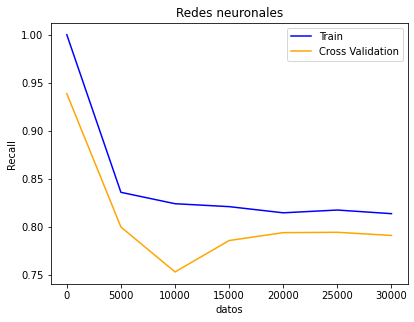

In [80]:
name = "RedesNeuronalesData"

#DataFrame 
df_array = np.array(df)
X = df_array[:, 1:]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
print(X_train.shape)
X_train, Y_train = shuffle(X_train, Y_train)

neuronas = [5, 10, 20, 50, 100, 150, 200, 250, 400, 500]
for neurona_i in neuronas:
    plt.clf() #Para limpiar el grafico anterior
    name_i = name + str(neurona_i)
    main_RN_data(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, True, name_i, neurona_i)

Para lambda: 0
Recall en validacion: 0.8
Para lambda: 0.05
Recall en validacion: 0.7839269406392694
Para lambda: 0.1
Recall en validacion: 0.7979908675799087
Para lambda: 0.15
Recall en validacion: 0.7892237442922374
Para lambda: 0.25
Recall en validacion: 0.7959817351598174
Para lambda: 0.5
Recall en validacion: 0.8010958904109589
Para lambda: 1
Recall en validacion: 0.794337899543379
Para lambda: 1.5
Recall en validacion: 0.7974429223744293
Para lambda: 2
Recall en validacion: 0.8007305936073059
Para lambda: 3
Recall en validacion: 0.7963470319634703
Para lambda: 4
Recall en validacion: 0.7981735159817351
Para lambda: 5
Recall en validacion: 0.7974429223744293
Para lambda: 6
Recall en validacion: 0.7959817351598174
Para lambda: 7
Recall en validacion: 0.7965296803652968
Para lambda: 10
Recall en validacion: 0.7992694063926941
Para lambda: 15
Recall en validacion: 0.7972602739726027
Para lambda: 20
Recall en validacion: 0.7948858447488585
Para lambda: 25
Recall en validacion: 0.793789

0.8016075995615638

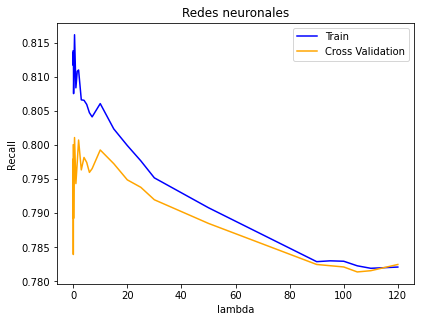

In [81]:
name = "RedesneuronalesLMB.png"

#DataFrame 
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#lmb = [0,0.1,1,2]
lmb = [0, 0.05, 0.1, 0.15, 0.25, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 10, 15, 20, 25, 30, 50, 90, 95, 100, 105, 110, 120]
#lmb = [8,9,9.5,10,10.5,11]
#lmb = [0,0.05, 0.1, 0.15, 0.2, 0.25]
#lmb = [50,60,70,80,90,95,100,105,110,120]
#lmb = 
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
#X_train, Y_train = shuffle(X_train, Y_train)


main_RN_lambda(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, name, 250)

#### Dataset con 11 variables

(32848, 10)
              precision    recall  f1-score   support

          no       0.98      0.56      0.71     58485
          si       0.16      0.87      0.27      5474

    accuracy                           0.59     63959
   macro avg       0.57      0.71      0.49     63959
weighted avg       0.91      0.59      0.68     63959

              precision    recall  f1-score   support

          no       0.98      0.57      0.72     58485
          si       0.16      0.85      0.27      5474

    accuracy                           0.60     63959
   macro avg       0.57      0.71      0.49     63959
weighted avg       0.91      0.60      0.68     63959

              precision    recall  f1-score   support

          no       0.97      0.60      0.74     58485
          si       0.16      0.84      0.27      5474

    accuracy                           0.62     63959
   macro avg       0.57      0.72      0.51     63959
weighted avg       0.91      0.62      0.70     63959

       

/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky400

              precision    recall  f1-score   support

          no       0.98      0.57      0.72     58485
          si       0.16      0.86      0.26      5474

    accuracy                           0.59     63959
   macro avg       0.57      0.71      0.49     63959
weighted avg       0.91      0.59      0.68     63959

              precision    recall  f1-score   support

          no       0.97      0.59      0.74     58485
          si       0.16      0.83      0.27      5474

    accuracy                           0.61     63959
   macro avg       0.57      0.71      0.50     63959
weighted avg       0.90      0.61      0.70     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.

              precision    recall  f1-score   support

          no       0.98      0.57      0.72     58485
          si       0.16      0.85      0.26      5474

    accuracy                           0.59     63959
   macro avg       0.57      0.71      0.49     63959
weighted avg       0.91      0.59      0.68     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.97      0.64      0.77     58485
          si       0.18      0.82      0.29      5474

    accuracy                           0.66     63959
   macro avg       0.57      0.73      0.53     63959
weighted avg       0.91      0.66      0.73     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.56      0.72     58485
          si       0.16      0.86      0.26      5474

    accuracy                           0.59     63959
   macro avg       0.57      0.71      0.49     63959
weighted avg       0.91      0.59      0.68     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.56      0.71     58485
          si       0.15      0.85      0.26      5474

    accuracy                           0.58     63959
   macro avg       0.56      0.71      0.49     63959
weighted avg       0.91      0.58      0.67     63959



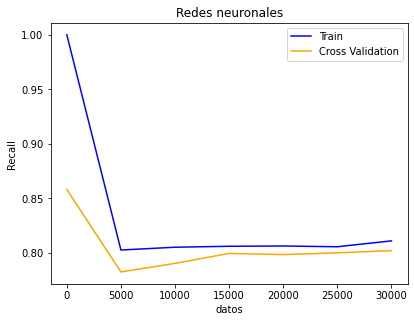

In [82]:
name = "RedesNeuronalesData_11VAR_"

#DataFrame 
df_array = np.array(df_copia)
X = df_array[:, 1:]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
print(X_train.shape)
X_train, Y_train = shuffle(X_train, Y_train)

neuronas = [5, 10, 20, 50, 100, 150, 200, 250, 400, 500]
for neurona_i in neuronas:
    plt.clf() #Para limpiar el grafico anterior
    name_i = name + str(neurona_i)
    main_RN_data(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, True, name_i, neurona_i)

Para lambda: 0
Recall en validacion: 0.7919634703196347
Para lambda: 0.05
Recall en validacion: 0.8021917808219178
Para lambda: 0.1
Recall en validacion: 0.8018264840182648
Para lambda: 0.15
Recall en validacion: 0.7983561643835616
Para lambda: 0.25
Recall en validacion: 0.8036529680365296
Para lambda: 0.5
Recall en validacion: 0.8047488584474886
Para lambda: 1
Recall en validacion: 0.8038356164383562
Para lambda: 1.5
Recall en validacion: 0.8034703196347032
Para lambda: 2
Recall en validacion: 0.8036529680365296
Para lambda: 3
Recall en validacion: 0.7987214611872147
Para lambda: 4
Recall en validacion: 0.7994520547945205
Para lambda: 5
Recall en validacion: 0.7941552511415525
Para lambda: 6
Recall en validacion: 0.794703196347032
Para lambda: 7
Recall en validacion: 0.7934246575342466
Para lambda: 10
Recall en validacion: 0.7919634703196347
Para lambda: 15
Recall en validacion: 0.7910502283105023
Para lambda: 20
Recall en validacion: 0.7884931506849315
Para lambda: 25
Recall en valid

0.8032517354767994

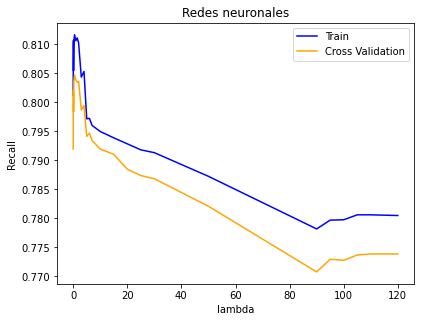

In [83]:
name = "RedesneuronalesLMB_11VAR.png"

#DataFrame 
df_array = np.array(df_copia)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#lmb = [0,0.1,1,2]
lmb = [0, 0.05, 0.1, 0.15, 0.25, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 10, 15, 20, 25, 30, 50, 90, 95, 100, 105, 110, 120]
#lmb = [8,9,9.5,10,10.5,11]
#lmb = [0,0.05, 0.1, 0.15, 0.2, 0.25]
#lmb = [50,60,70,80,90,95,100,105,110,120]
#lmb = 
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
#X_train, Y_train = shuffle(X_train, Y_train)


main_RN_lambda(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, name, 250)

#### Eliminacion Outliers

(19034, 25)


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/4275500281.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


              precision    recall  f1-score   support

          no       0.98      0.73      0.83     43032
          si       0.18      0.80      0.29      3172

    accuracy                           0.73     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.73      0.80     46204

              precision    recall  f1-score   support

          no       0.98      0.72      0.83     43032
          si       0.18      0.80      0.29      3172

    accuracy                           0.73     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.73      0.80     46204



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.72      0.83     43032
          si       0.18      0.80      0.29      3172

    accuracy                           0.73     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.73      0.79     46204



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.73      0.83     43032
          si       0.18      0.80      0.29      3172

    accuracy                           0.73     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.73      0.80     46204

              precision    recall  f1-score   support

          no       0.98      0.72      0.83     43032
          si       0.17      0.80      0.29      3172

    accuracy                           0.73     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.73      0.79     46204

              precision    recall  f1-score   support

          no       0.98      0.72      0.83     43032
          si       0.17      0.80      0.28      3172

    accuracy                           0.72     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.72      0.79     46204



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.72      0.83     43032
          si       0.17      0.80      0.28      3172

    accuracy                           0.73     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.73      0.79     46204



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.73      0.84     43032
          si       0.18      0.79      0.29      3172

    accuracy                           0.73     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.73      0.80     46204



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.73      0.84     43032
          si       0.18      0.79      0.29      3172

    accuracy                           0.74     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.74      0.80     46204



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.72      0.83     43032
          si       0.18      0.80      0.29      3172

    accuracy                           0.73     46204
   macro avg       0.58      0.76      0.56     46204
weighted avg       0.92      0.73      0.80     46204



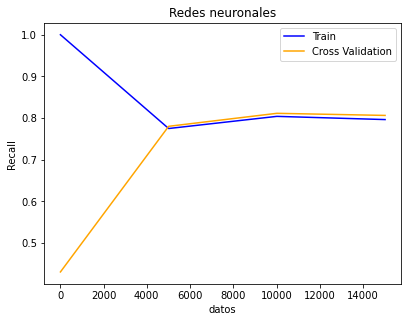

In [84]:
name = "RedesNeuronalesData_NO_OUTLIERS_"

#DataFrame 
df_array = np.array(data_clean_no_outliers)
X = df_array[:, 1:]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
print(X_train.shape)
X_train, Y_train = shuffle(X_train, Y_train)

neuronas = [5, 10, 20, 50, 100, 150, 200, 250, 400, 500]
for neurona_i in neuronas:
    plt.clf() #Para limpiar el grafico anterior
    name_i = name + str(neurona_i)
    main_RN_data(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, True, name_i, neurona_i)

Para lambda: 0
Recall en validacion: 0.8086380832282472
Para lambda: 0.05
Recall en validacion: 0.8086380832282472
Para lambda: 0.1
Recall en validacion: 0.8121059268600253
Para lambda: 0.15
Recall en validacion: 0.8152585119798235
Para lambda: 0.25
Recall en validacion: 0.8092686002522068
Para lambda: 0.5
Recall en validacion: 0.8117906683480454
Para lambda: 1
Recall en validacion: 0.8133669609079445
Para lambda: 1.5
Recall en validacion: 0.8162042875157629
Para lambda: 2
Recall en validacion: 0.8152585119798235
Para lambda: 3
Recall en validacion: 0.8162042875157629
Para lambda: 4
Recall en validacion: 0.8190416141235813
Para lambda: 5
Recall en validacion: 0.8105296343001261
Para lambda: 6
Recall en validacion: 0.8102143757881463
Para lambda: 7
Recall en validacion: 0.8086380832282472
Para lambda: 10
Recall en validacion: 0.8048549810844893
Para lambda: 15
Recall en validacion: 0.8048549810844893
Para lambda: 20
Recall en validacion: 0.8073770491803278
Para lambda: 25
Recall en vali

0.8054854981084489

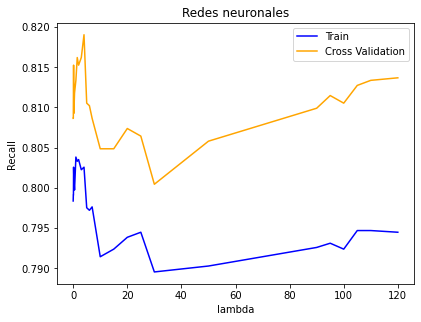

In [85]:
name = "RedesneuronalesLMB_NO_OUTLIERS.png"

#DataFrame 
df_array = np.array(data_clean_no_outliers)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#lmb = [0,0.1,1,2]
lmb = [0, 0.05, 0.1, 0.15, 0.25, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 10, 15, 20, 25, 30, 50, 90, 95, 100, 105, 110, 120]
#lmb = [8,9,9.5,10,10.5,11]
#lmb = [0,0.05, 0.1, 0.15, 0.2, 0.25]
#lmb = [50,60,70,80,90,95,100,105,110,120]
#lmb = 
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
#X_train, Y_train = shuffle(X_train, Y_train)


main_RN_lambda(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, name, 250)

#### Dataset de 11 variables y eliminación de outliers

(21040, 10)


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.99      0.45      0.62     49503
          si       0.11      0.91      0.19      3506

    accuracy                           0.48     53009
   macro avg       0.55      0.68      0.40     53009
weighted avg       0.93      0.48      0.59     53009



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.97      0.51      0.67     49503
          si       0.10      0.81      0.18      3506

    accuracy                           0.53     53009
   macro avg       0.54      0.66      0.43     53009
weighted avg       0.92      0.53      0.64     53009



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.99      0.41      0.58     49503
          si       0.10      0.94      0.18      3506

    accuracy                           0.45     53009
   macro avg       0.55      0.68      0.38     53009
weighted avg       0.93      0.45      0.56     53009



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.42      0.59     49503
          si       0.10      0.89      0.18      3506

    accuracy                           0.45     53009
   macro avg       0.54      0.66      0.38     53009
weighted avg       0.92      0.45      0.56     53009



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.99      0.40      0.57     49503
          si       0.10      0.92      0.18      3506

    accuracy                           0.43     53009
   macro avg       0.54      0.66      0.37     53009
weighted avg       0.93      0.43      0.54     53009



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.97      0.46      0.62     49503
          si       0.09      0.80      0.17      3506

    accuracy                           0.48     53009
   macro avg       0.53      0.63      0.39     53009
weighted avg       0.91      0.48      0.59     53009



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.99      0.41      0.58     49503
          si       0.10      0.91      0.18      3506

    accuracy                           0.44     53009
   macro avg       0.54      0.66      0.38     53009
weighted avg       0.93      0.44      0.55     53009



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.42      0.59     49503
          si       0.10      0.91      0.18      3506

    accuracy                           0.45     53009
   macro avg       0.54      0.66      0.38     53009
weighted avg       0.93      0.45      0.56     53009



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.39      0.56     49503
          si       0.09      0.90      0.17      3506

    accuracy                           0.43     53009
   macro avg       0.54      0.65      0.37     53009
weighted avg       0.92      0.43      0.54     53009



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_10429/1940543107.py:8: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.99      0.37      0.54     49503
          si       0.09      0.92      0.17      3506

    accuracy                           0.41     53009
   macro avg       0.54      0.65      0.36     53009
weighted avg       0.93      0.41      0.51     53009



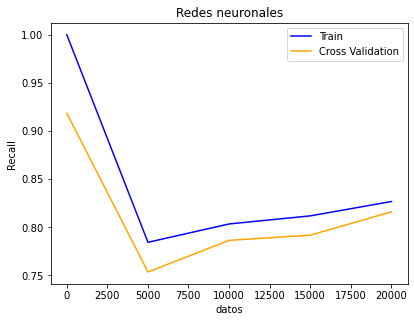

In [86]:
name = "RedesNeuronalesData_11VAR_NO_OUTLIERS_"

#DataFrame 
df_array = np.array(data_clean_11var_noOutliers)
X = df_array[:, 1:]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
print(X_train.shape)
X_train, Y_train = shuffle(X_train, Y_train)

neuronas = [5, 10, 20, 50, 100, 150, 200, 250, 400, 500]
for neurona_i in neuronas:
    plt.clf() #Para limpiar el grafico anterior
    name_i = name + str(neurona_i)
    main_RN_data(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, True, name_i, neurona_i)

Para lambda: 0
Recall en validacion: 0.7972626176218991
Para lambda: 0.05
Recall en validacion: 0.8026803535785572
Para lambda: 0.1
Recall en validacion: 0.8120901055032792
Para lambda: 0.15
Recall en validacion: 0.7958368976333048
Para lambda: 0.25
Recall en validacion: 0.7972626176218991
Para lambda: 0.5
Recall en validacion: 0.7949814656401483
Para lambda: 1
Recall en validacion: 0.7852865697177075
Para lambda: 1.5
Recall en validacion: 0.7852865697177075
Para lambda: 2
Recall en validacion: 0.7835757057313943
Para lambda: 3
Recall en validacion: 0.7869974337040205
Para lambda: 4
Recall en validacion: 0.7835757057313943
Para lambda: 5
Recall en validacion: 0.7852865697177075
Para lambda: 6
Recall en validacion: 0.7858568577131452
Para lambda: 7
Recall en validacion: 0.786142001710864
Para lambda: 10
Recall en validacion: 0.7830054177359567
Para lambda: 15
Recall en validacion: 0.7812945537496435
Para lambda: 20
Recall en validacion: 0.7801539777587682
Para lambda: 25
Recall en valid

0.8080433542498574

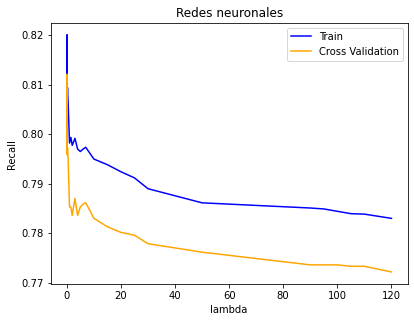

In [87]:
name = "RedesneuronalesLMB_11VAR_NO_OUTLIERS.png"

#DataFrame 
df_array = np.array(data_clean_11var_noOutliers)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#lmb = [0,0.1,1,2]
lmb = [0, 0.05, 0.1, 0.15, 0.25, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 7, 10, 15, 20, 25, 30, 50, 90, 95, 100, 105, 110, 120]
#lmb = [8,9,9.5,10,10.5,11]
#lmb = [0,0.05, 0.1, 0.15, 0.2, 0.25]
#lmb = [50,60,70,80,90,95,100,105,110,120]
#lmb = 
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
#X_train, Y_train = shuffle(X_train, Y_train)


main_RN_lambda(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, name, 250)

## SVM

### Lineal

In [88]:
def porcentaje_aciertos_SVM(Y,Y_pred, mostrar):
 
    if mostrar:
        print(classification_report(Y,Y_pred, target_names=["no", "si"]))
        print(confusion_matrix(Y,Y_pred))
    
    #Obtenemos la especificidad y la sensibilidad
    recall_0 = confusion_matrix(Y,Y_pred, normalize = "true")[0][0]
    if(len(confusion_matrix(Y,Y_pred, normalize = "true")) < 2):
        if(np.sum(Y) == 0):
            recall_1 = 1
        else:
            recall_1 = 0
    else:
        recall_1 = confusion_matrix(Y,Y_pred, normalize = "true")[1][1]
    #print(recall_0)
    #print(recall_1)
    #print(len(Y))
    #harm_recall = 2/((1.0/recall_0) + (1.0/recall_1)) 
    # Devolvemos el porcentaje
    #return harm_recall
    return recall_1

In [89]:
def Main_svm_linearKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, name):
    
    c = 0

    Max = 0
    BestC = 0
    accAux = 0
    errorV = []
    errorT = []
    for i in C:
        print("Para C: " + str(i))
        svm_clf = svm.SVC(kernel='linear' , C=i)
        svm_clf.fit(X_train, Y_train)
        
        T_svm_predict = svm_clf.predict(X_train)
        errorT.append(porcentaje_aciertos_SVM(Y_train, T_svm_predict, False))
        print("Finished fit")
        
        Y_svm_predict = svm_clf.predict(X_val)

        print("Finished predicting")
        
        porcentaje = porcentaje_aciertos_SVM(Y_val, Y_svm_predict, False)
        print("Recall en validación: "+ str(porcentaje))
        errorV.append(porcentaje)
        if porcentaje > Max:
            Max = porcentaje
            BestC = i
        #Confusion Matrix
        title_img = "randomState_linearKernel" + str(i) + ".png"
        #plot_confusion_matrix(Y_svm_test, Y_svm_predict, ['normal', 'enfermo'], normalize=True, title=title_img)
        #print(confusion_matrix(Y_svm_test, Y_svm_predict))
        
    draw_learning_curve(errorT, errorV, "Support Vector Machine", "C", C)
    plt.savefig(name)
    svm_clf = svm.SVC(kernel='linear' , C=BestC)
    svm_clf.fit(X_train, Y_train)
    print("Test")
    print("Mejor valor de C : " + str(BestC))
    print("Finished fit")
        
    Y_svm_predict = svm_clf.predict(X_test)

    print("Finished predicting")
        
    porcentaje = porcentaje_aciertos_SVM(Y_test, Y_svm_predict, True)
    print("Recall para la clase 1: " + str(porcentaje))
    return porcentaje

Para C: 0.005
Finished fit
Finished predicting
Recall en validación: 0.8001826484018265
Para C: 0.01
Finished fit
Finished predicting
Recall en validación: 0.8005479452054794
Para C: 0.015
Finished fit
Finished predicting
Recall en validación: 0.7994520547945205
Para C: 0.02
Finished fit
Finished predicting
Recall en validación: 0.7992694063926941
Para C: 0.03
Finished fit
Finished predicting
Recall en validación: 0.7981735159817351
Para C: 0.05
Finished fit
Finished predicting
Recall en validación: 0.7981735159817351
Para C: 0.1
Finished fit
Finished predicting
Recall en validación: 0.7979908675799087
Para C: 0.3
Finished fit
Finished predicting
Recall en validación: 0.7974429223744293
Para C: 0.5
Finished fit
Finished predicting
Recall en validación: 0.7972602739726027
Para C: 1
Finished fit
Finished predicting
Recall en validación: 0.7972602739726027
Test
Mejor valor de C : 0.01
Finished fit
Finished predicting
              precision    recall  f1-score   support

          no     

0.7963098282791378

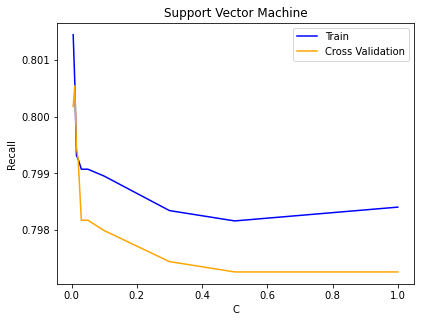

In [90]:
name = "SupportVectorMachinesLinear_0.01_1.png"

#DataFrame 
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
C = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1, 0.3, 0.5, 1]
#C = [0.005, 0.01,0.015]

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

Main_svm_linearKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, name)

#### Dataset con 11 variables

Para C: 0.005
Finished fit
Finished predicting
Recall en validación: 0.7744292237442922
Para C: 0.01
Finished fit
Finished predicting
Recall en validación: 0.7768036529680366
Para C: 0.015
Finished fit
Finished predicting
Recall en validación: 0.7768036529680366
Para C: 0.02
Finished fit
Finished predicting
Recall en validación: 0.7768036529680366
Para C: 0.03
Finished fit
Finished predicting
Recall en validación: 0.7768036529680366
Para C: 0.05
Finished fit
Finished predicting
Recall en validación: 0.7768036529680366
Para C: 0.1
Finished fit
Finished predicting
Recall en validación: 0.7768036529680366
Para C: 0.3
Finished fit
Finished predicting
Recall en validación: 0.7768036529680366
Para C: 0.5
Finished fit
Finished predicting
Recall en validación: 0.7768036529680366
Para C: 1
Finished fit
Finished predicting
Recall en validación: 0.7768036529680366
Test
Mejor valor de C : 0.01
Finished fit
Finished predicting
              precision    recall  f1-score   support

          no     

0.7771282426013884

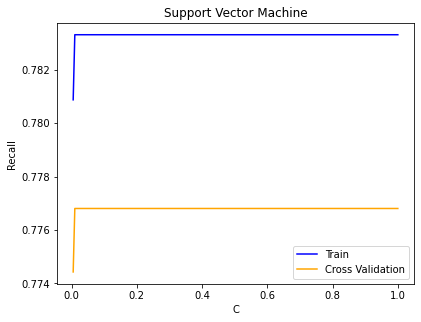

In [91]:
name = "SupportVectorMachinesLinear_11VAR.png"

#DataFrame 
df_array = np.array(df_copia)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
C = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1, 0.3, 0.5, 1]
#C = [0.005, 0.01,0.015]

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

Main_svm_linearKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, name)

#### Eliminación de outliers

Para C: 0.005
Finished fit
Finished predicting
Recall en validación: 0.8278688524590164
Para C: 0.01
Finished fit
Finished predicting
Recall en validación: 0.8244010088272383
Para C: 0.015
Finished fit
Finished predicting
Recall en validación: 0.8256620428751577
Para C: 0.02
Finished fit
Finished predicting
Recall en validación: 0.8221941992433796
Para C: 0.03
Finished fit
Finished predicting
Recall en validación: 0.8203026481715007
Para C: 0.05
Finished fit
Finished predicting
Recall en validación: 0.8187263556116016
Para C: 0.1
Finished fit
Finished predicting
Recall en validación: 0.817780580075662
Para C: 0.3
Finished fit
Finished predicting
Recall en validación: 0.8174653215636822
Para C: 0.5
Finished fit
Finished predicting
Recall en validación: 0.8168348045397226
Para C: 1
Finished fit
Finished predicting
Recall en validación: 0.8168348045397226
Test
Mejor valor de C : 0.005
Finished fit
Finished predicting
              precision    recall  f1-score   support

          no     

0.8168348045397226

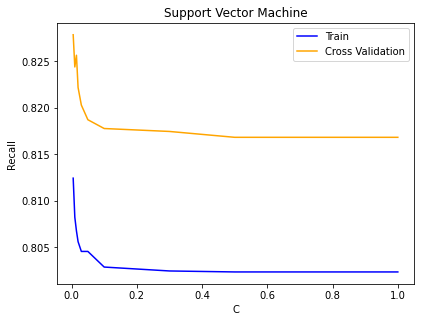

In [92]:
name = "SupportVectorMachinesLinear_NO_OUTLIERS.png"

#DataFrame 
df_array = np.array(data_clean_no_outliers)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
C = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1, 0.3, 0.5, 1]
#C = [0.005, 0.01,0.015]

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

Main_svm_linearKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, name)

#### Dataset con 11 variables y eliminación de outliers

Para C: 0.005
Finished fit
Finished predicting
Recall en validación: 0.808668377530653
Para C: 0.01
Finished fit
Finished predicting
Recall en validación: 0.786142001710864
Para C: 0.015
Finished fit
Finished predicting
Recall en validación: 0.8058169375534645
Para C: 0.02
Finished fit
Finished predicting
Recall en validación: 0.8149415454804676
Para C: 0.03
Finished fit
Finished predicting
Recall en validación: 0.7889934416880525
Para C: 0.05
Finished fit
Finished predicting
Recall en validación: 0.8138009694895922
Para C: 0.1
Finished fit
Finished predicting
Recall en validación: 0.7901340176789279
Para C: 0.3
Finished fit
Finished predicting
Recall en validación: 0.7918448816652409
Para C: 0.5
Finished fit
Finished predicting
Recall en validación: 0.8032506415739948
Para C: 1
Finished fit
Finished predicting
Recall en validación: 0.818078129455375
Test
Mejor valor de C : 1
Finished fit
Finished predicting
              precision    recall  f1-score   support

          no       0.98

0.8200228180262408

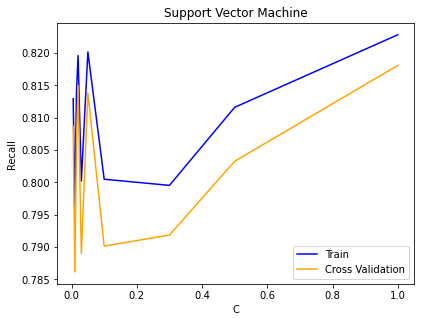

In [93]:
name = "SupportVectorMachinesLinear_11VAR_NO_OUTLIERS.png"

#DataFrame 
df_array = np.array(data_clean_11var_noOutliers)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
C = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1, 0.3, 0.5, 1]
#C = [0.005, 0.01,0.015]

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

Main_svm_linearKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, name)

# SVM con Kernel Gaussiano

In [94]:
def Main_svm_gaussianKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, sigma, name):
    
    c = 0
    sig = 0
    
    Max = 0
    BestC = 0
    Bestsigma = 0
    accAux = 0
    errorV = []
    errorT = []
    Vars = []
    accAux = 0
    for i in C:
        Vars.clear()
        errorT.clear()
        errorV.clear()
        for j in sigma:
            
            Vars.append(str(j))
            print("Execution:", i, j)
            svm_clf = svm.SVC(kernel='rbf' , C=i, gamma = (1 / (2 * j**2)))
            svm_clf.fit(X_train, Y_train)

            print("Finish fit")
            
            T_svm_predict = svm_clf.predict(X_train)
            errorT.append(porcentaje_aciertos_SVM(Y_train, T_svm_predict, False))
            print("Finished fit")
            
            Y_svm_predict_val = svm_clf.predict(X_val)
            
            porcentaje = porcentaje_aciertos_SVM(Y_val, Y_svm_predict_val, True)
            errorV.append(porcentaje)
            if porcentaje > Max:
                Max = porcentaje
                BestC = i
                Bestsigma = j

        plt.figure().clear()
        plt.cla()
        plt.clf()
        draw_learning_curve(errorT, errorV, "C_" + str(i), "sigma", Vars)
        plt.savefig("C_" + str(i) + ".png")

    print("Finished predicting")
    #plt.rcParams["figure.figsize"] = (20, 7)
    print("Test results for best C: " + str(BestC) + " and best sigma " + str(Bestsigma))
    #draw_learning_curve(errorT, errorV, "Support Vector Machine", "C", Vars)
    
    #plt.savefig(name)
    
    svm_clf = svm.SVC(kernel='rbf' , C=BestC, gamma = (1 / (2 * Bestsigma**2)))
    svm_clf.fit(X_train, Y_train)

    print("Finished fit")
    #plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    Y_svm_predict = svm_clf.predict(X_test)

    print("Finished predicting")
        
    porcentaje = porcentaje_aciertos_SVM(Y_test, Y_svm_predict, True)
    print("Recall para la clase 1: " + str(porcentaje))
    
    return porcentaje 
        


In [95]:
name = "SupportVectorMachinesGaussian0.01_40.png"

#DataFrame 
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

C = [0.1, 0.5, 1, 10, 20, 40]
sigma = [1, 5, 10, 20, 30, 40]

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

Main_svm_gaussianKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, sigma, name)

Execution: 0.1 1
Finish fit
Finished fit
              precision    recall  f1-score   support

          no       0.98      0.64      0.77     58484
          si       0.18      0.86      0.30      5475

    accuracy                           0.65     63959
   macro avg       0.58      0.75      0.53     63959
weighted avg       0.91      0.65      0.73     63959

[[37196 21288]
 [  782  4693]]
Execution: 0.1 5
Finish fit
Finished fit
              precision    recall  f1-score   support

          no       0.98      0.71      0.83     58484
          si       0.21      0.81      0.33      5475

    accuracy                           0.72     63959
   macro avg       0.59      0.76      0.58     63959
weighted avg       0.91      0.72      0.78     63959

[[41807 16677]
 [ 1041  4434]]
Execution: 0.1 10
Finish fit
Finished fit
              precision    recall  f1-score   support

          no       0.98      0.72      0.83     58484
          si       0.21      0.81      0.33      54

#### Dataset con 11 variables

In [ ]:
name = "SupportVectorMachinesGaussian_11VAR.png"

#DataFrame 
df_array = np.array(df_copia)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

C = [0.1, 0.5, 1, 10, 20, 40]
sigma = [1, 5, 10, 20, 30, 40]

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

Main_svm_gaussianKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, sigma, name)

#### Eliminación de outliers

In [ ]:
name = "SupportVectorMachinesGaussian_NO_OUTLIERS.png"

#DataFrame 
df_array = np.array(data_clean_no_outliers)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

C = [0.1, 0.5, 1, 10, 20, 40]
sigma = [1, 5, 10, 20, 30, 40]

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

Main_svm_gaussianKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, sigma, name)

#### Dataset con 11 variables y eliminación de outliers

In [ ]:
name = "SupportVectorMachinesGaussian0.01_40.png"

#DataFrame 
df_array = np.array(data_clean_11var_noOutliers)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

C = [0.1, 0.5, 1, 10, 20, 40]
sigma = [1, 5, 10, 20, 30, 40]

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

Main_svm_gaussianKernel(X_train, Y_train, X_val, Y_val, X_test, Y_test, C, sigma, name)

# Comparing other algorithms

In [ ]:
#DataFrame 
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

In [ ]:
from sklearn.neural_network import MLPClassifier
modelo=MLPClassifier()
modelo.fit(X_train, Y_train)
prediccion = modelo.predict(X_test)
report = classification_report(Y_test, prediccion)
print(report)

cnf_matrix = confusion_matrix(Y_test, prediccion)
print(cnf_matrix)

C:\Users\usuario_local\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.98      0.70      0.81     58485
         1.0       0.20      0.81      0.32      5474

    accuracy                           0.71     63959
   macro avg       0.59      0.76      0.57     63959
weighted avg       0.91      0.71      0.77     63959

[[40861 17624]
 [ 1029  4445]]


In [ ]:
from sklearn.ensemble import BaggingClassifier
modelo=BaggingClassifier(n_estimators = 250, random_state = 1000)
modelo.fit(X_train, Y_train)
prediccion = modelo.predict(X_test)
report = classification_report(Y_test, prediccion)
print(report)
cnf_matrix = confusion_matrix(Y_test, prediccion)
print(cnf_matrix)

              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     58485
         1.0       0.20      0.76      0.31      5474

    accuracy                           0.72     63959
   macro avg       0.58      0.74      0.57     63959
weighted avg       0.90      0.72      0.78     63959

[[41671 16814]
 [ 1326  4148]]


In [ ]:
from sklearn.naive_bayes import BernoulliNB
modelo = BernoulliNB()
modelo.fit(X_train, Y_train)
prediccion = modelo.predict(X_test)
report = classification_report(Y_test, prediccion)

print(report)

cnf_matrix = confusion_matrix(Y_test, prediccion)
print(cnf_matrix)

              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85     58485
         1.0       0.22      0.70      0.33      5474

    accuracy                           0.76     63959
   macro avg       0.59      0.73      0.59     63959
weighted avg       0.90      0.76      0.81     63959

[[44605 13880]
 [ 1644  3830]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
modelo = RandomForestClassifier(criterion='gini', random_state=0)
modelo.fit(X_train, Y_train)

prediccion = modelo.predict(X_test)
report = classification_report(Y_test, prediccion)

print(report)
cnf_matrix = confusion_matrix(Y_test, prediccion)
print(cnf_matrix)

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.82     58485
         1.0       0.20      0.76      0.32      5474

    accuracy                           0.72     63959
   macro avg       0.59      0.74      0.57     63959
weighted avg       0.90      0.72      0.78     63959

[[41860 16625]
 [ 1300  4174]]


In [ ]:
#Gradient Boosting

modelo = GradientBoostingClassifier(loss='deviance', random_state=1000)
modelo.fit(X_train, Y_train)

prediccion = modelo.predict(X_test)

report = classification_report(Y_test, prediccion)
print(report)

cnf_matrix = confusion_matrix(Y_test, prediccion)
print(cnf_matrix)

              precision    recall  f1-score   support

         0.0       0.97      0.73      0.84     58485
         1.0       0.22      0.80      0.34      5474

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.79     63959

[[42746 15739]
 [ 1110  4364]]
